# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [66]:
df_tesla = pd.read_csv('data/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('data/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-19.csv')
pd.options.display.float_format = '{:,.2f}'.format

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [ ]:
# df_tesla.shape # = 124,3
# df_btc_price.shape # = 2204, 2
# df_btc_search.shape # = 73, 2
df_unemployment.shape # = 181, 3

In [17]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_USD_CLOSE"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_USD_CLOSE"].min()}')

Largest value for Tesla in Web Search: 498.320007
Smallest value for Tesla in Web Search: 3.896


In [20]:
# --- Use .describe() to show multiple details about a dataframe, such as count, mean, max and more:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.00,124.00
mean,8.73,50.96
std,5.87,65.91
min,2.00,3.90
25%,3.75,7.35
50%,8.00,44.65
75%,12.00,58.99
max,31.00,498.32


### Unemployment Data

In [23]:
df_unemployment.shape
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.70
1,2004-02,33,5.60
2,2004-03,25,5.80
3,2004-04,29,5.60
4,2004-05,23,5.60


In [22]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [ ]:
df_btc_price.shape
df_btc_price.head()

In [ ]:
df_btc_search.shape
df_btc_search.head()

In [6]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')

largest BTC News Search: 


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [30]:
print(f'Missing values for Tesla?: { df_tesla.isna().values.any() }')
print(f'Missing values for U/E?: { df_unemployment.isna().values.any() }')
print(f'Missing values for BTC Search?: { df_btc_search.isna().values.any() }')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [31]:
print(f'Missing values for BTC price?: { df_btc_price.isna().values.any() }')

Missing values for BTC price?: True


In [68]:
print(f'Number of missing values:\n{ df_btc_price.isna().sum() }')
df_btc_price[df_btc_price["CLOSE"].isna()]

Number of missing values:
DATE      0
CLOSE     0
VOLUME    0
dtype: int64


,DATE,CLOSE,VOLUME


**Challenge**: Remove any missing values that you found. 

In [67]:
# --- dropna will remove any rows with NaN values. 
# --- inplace=True will do it to the existing dataframe which saves you having to create another one:
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [69]:
print(type(df_btc_price.DATE[2]))
print(type(df_btc_search.MONTH[2]))
print(type(df_tesla.MONTH[2]))
print(type(df_unemployment.MONTH[2]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [70]:
# --- Convert each date / month column from a str to a timestamp:
df_btc_price["DATE"] = pd.to_datetime(df_btc_price['DATE'])
df_btc_search["MONTH"] = pd.to_datetime(df_btc_search['MONTH'])
df_tesla["MONTH"] = pd.to_datetime(df_tesla['MONTH'])
df_unemployment["MONTH"] = pd.to_datetime(df_unemployment['MONTH'])

In [71]:
print(type(df_btc_price.DATE[2]))
print(type(df_btc_search.MONTH[2]))
print(type(df_tesla.MONTH[2]))
print(type(df_unemployment.MONTH[2]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [72]:
df_btc_price_monthly = df_btc_price.resample("M", on="DATE").last()

In [ ]:
df_btc_price_monthly.head(n=5)

# Data Visualisation

### Notebook Formatting & Style Helpers

In [104]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

In [21]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

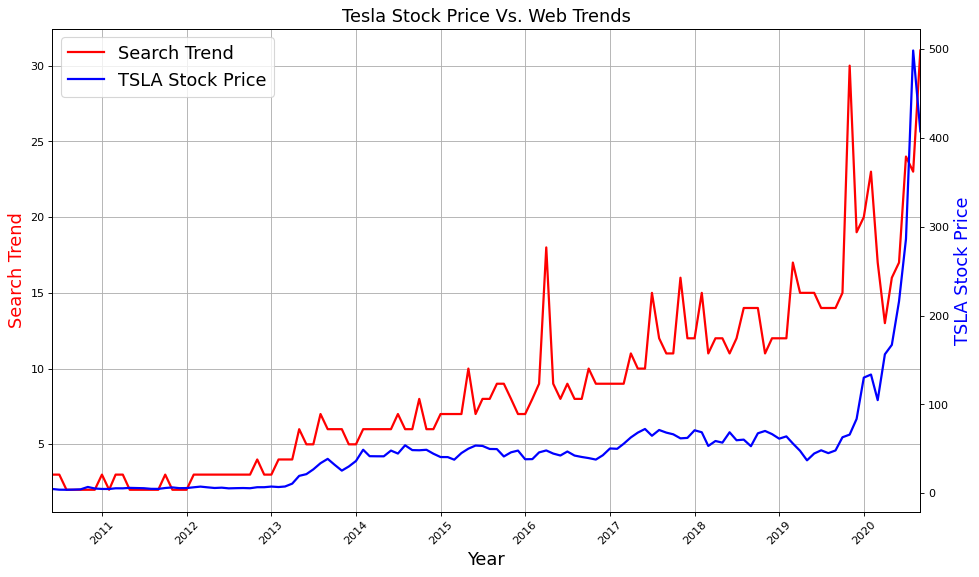

In [105]:
# --- Create a figure:
plt.figure(figsize=(14,8), dpi=80)
plt.grid()

# --- Change the text on the x-axis to be rotated 45 degrees:
plt.xticks(rotation=45)

# --- Plot twin y-axis'
ax_y_1 = plt.gca()
ax_y_2 = plt.twinx()

# --- Set the graphs title:
ax_y_1.set_title("Tesla Stock Price Vs. Web Trends", fontsize=16)

# --- Get the data for the first y-axis:
lns1 = ax_y_1.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="red", label = "Search Trend", linewidth=2,)
ax_y_1.set_ylabel("Search Trend", fontsize=16, color="red")
ax_y_1.set_xlabel("Year", fontsize=16)
ax_y_1.set_xlim(df_tesla.MONTH.min(), df_tesla.MONTH.max())

# --- Get the data for the second y-axis:
lns2 = ax_y_2.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="Blue", label = "TSLA Stock Price", linewidth=2)
ax_y_2.set_ylabel("TSLA Stock Price", fontsize=16, color="Blue")

# --- Create the legend:
leg = lns1 + lns2
labs = [l.get_label() for l in leg]

ax_y_1.legend(leg, labs, loc=0, fontsize=16)

plt.show() 

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

How to add tick formatting for dates on the x-axis. 

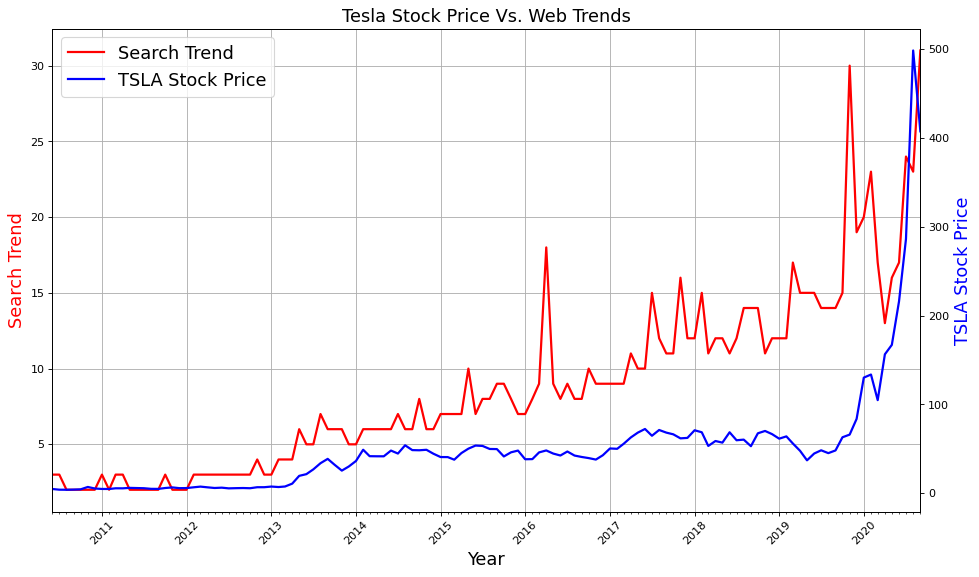

In [111]:
# --- Create a figure:
plt.figure(figsize=(14,8), dpi=80)
plt.grid()

# --- Change the text on the x-axis to be rotated 45 degrees:
plt.xticks(rotation=45)

# --- Plot twin y-axis'
ax_y_1 = plt.gca()
ax_y_2 = plt.twinx()

# --- Set the graphs title:
ax_y_1.set_title("Tesla Stock Price Vs. Web Trends", fontsize=16)

ax_y_1.xaxis.set_major_locator(years)
ax_y_1.xaxis.set_major_formatter(years_fmt)
ax_y_1.xaxis.set_minor_locator(months)

# --- Get the data for the first y-axis:
lns1 = ax_y_1.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="red", label = "Search Trend", linewidth=2,)
ax_y_1.set_ylabel("Search Trend", fontsize=16, color="red")
ax_y_1.set_xlabel("Year", fontsize=16)
ax_y_1.set_xlim(df_tesla.MONTH.min(), df_tesla.MONTH.max())

# --- Get the data for the second y-axis:
lns2 = ax_y_2.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="Blue", label = "TSLA Stock Price", linewidth=2)
ax_y_2.set_ylabel("TSLA Stock Price", fontsize=16, color="Blue")


# --- Create the legend:
leg = lns1 + lns2
labs = [l.get_label() for l in leg]

ax_y_1.legend(leg, labs, loc=0, fontsize=16)

plt.show() 

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

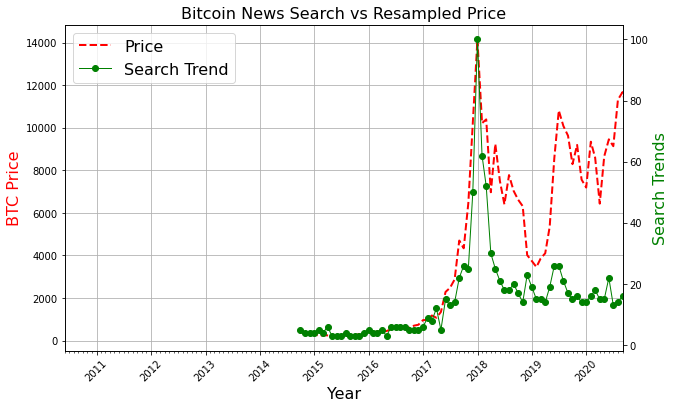

In [129]:
# --- Create a figure:
plt.figure(figsize=(10,6))
plt.grid()

# --- Change the text on the x-axis to be rotated 45 degrees:
plt.xticks(rotation=45)

# --- Plot twin y-axis'
ax_y_1 = plt.gca()
ax_y_2 = plt.twinx()

# --- Set the graphs title:
ax_y_1.set_title("Bitcoin News Search vs Resampled Price", fontsize=16)

# --- Display ticks:
ax_y_1.xaxis.set_major_locator(years)
ax_y_1.xaxis.set_major_formatter(years_fmt)
ax_y_1.xaxis.set_minor_locator(months)

# --- Get the data for the first y-axis:
lns1 = ax_y_1.plot(df_btc_price_monthly.DATE, df_btc_price_monthly.CLOSE, color="red", label = "Price", linewidth=2, linestyle="--")
ax_y_1.set_ylabel("BTC Price", fontsize=16, color="red")
ax_y_1.set_xlabel("Year", fontsize=16)
ax_y_1.set_xlim(df_tesla.MONTH.min(), df_tesla.MONTH.max())

# --- Get the data for the second y-axis:
lns2 = ax_y_2.plot(df_btc_price_monthly.DATE, df_btc_search.BTC_NEWS_SEARCH, color="green", label = "Search Trend", linewidth=1, marker="o")
ax_y_2.set_ylabel("Search Trends", fontsize=16, color="green")

# --- Create the legend:
leg = lns1 + lns2
labs = [l.get_label() for l in leg]

ax_y_1.legend(leg, labs, loc="upper left", fontsize=16)